In [39]:
import numpy as np
import numpy as np
from collections import Counter # to get the most common label in a given label vector
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA as PCABuiltIn
from matplotlib.colors import ListedColormap, BoundaryNorm

data = datasets.load_iris()
X = data.data
y = data.target

cov = np.cov(X.T)
        
# eigendecompose
eigenvalues, eigenvectors = np.linalg.eig(cov)

print(eigenvalues)
print(eigenvectors.T)

[4.22824171 0.24267075 0.0782095  0.02383509]
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [-0.65658877 -0.73016143  0.17337266  0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [ 0.31548719 -0.3197231  -0.47983899  0.75365743]]


In [20]:
class PCA:
    
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
    
    
    def fit(self, X):
        
        # compute means
        self.mean = np.mean(X, axis=0)
        X -= self.mean
        
        # compute covariance
        cov = np.cov(X.T)
        
        # eigendecompose
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        
        # Here column eigenvalues[:,i] is the eigenvector corresponding to the eigenvalues[i].
        eigenvectors = eigenvectors.T # now every row is a vector
        
        # sort the eigenvectors
        idxs = np.argsort(eigenvalues)[::-1]  # [::-1] will reverse from increasing to decreasing order
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        
        # store the first n_components eigenvectors
        self.components = eigenvectors[0:self.n_components]
    
    
    def project(self, X):
        X -= self.mean
        return np.dot(X, self.components.T)

<Figure size 432x288 with 0 Axes>

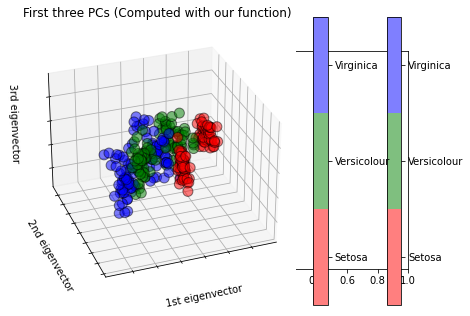

In [34]:
# Plot the first three principal components of the input feature matrix

col_dict={0:"red",
          1:"green",
          2:"blue"}


labels = np.array(["Setosa","Versicolour","Virginica"])
len_lab = len(labels)

# We create a colormar from our list of colors
cm = ListedColormap([col_dict[x] for x in col_dict.keys()])


norm_bins = np.sort([*col_dict.keys()]) + 0.5
norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)

## Make normalizer and formatter
norm = mpl.colors.BoundaryNorm(norm_bins, len_lab, clip=True)
fmt = mpl.ticker.FuncFormatter(lambda x, pos: labels[norm(x)])


fig = plt.figure()    
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex=True, sharey = True)


#fig = plt.figure(2, figsize=(16, 6))
ax = Axes3D(fig, elev=-150, azim=110, auto_add_to_figure=False)
fig.add_axes(ax)
PCAs_builtin = PCABuiltIn(n_components=3).fit_transform(X)
#print(PCAs_builtin)

pca = PCA(n_components=3)
pca.fit(X)
PCAs = pca.project(X)
#print(PCAs)
#print(PCAs_builtin)


p = ax.scatter(PCAs_builtin[:, 0],
          PCAs_builtin[:, 1],
          PCAs_builtin[:, 2],
          c=y,
          cmap=cm,
          norm = norm,
          edgecolor="k",
          s =100,
          alpha = 0.5)

ax.set_title("First three PCs (Computed with built-in function)")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

diff = norm_bins[1:] - norm_bins[:-1]
tickz = norm_bins[:-1] + diff / 2
cb = fig.colorbar(p, format=fmt, ticks=tickz)



p = ax.scatter(PCAs[:, 0],
          PCAs[:, 1],
          PCAs[:, 2],
          c=y,
          cmap=cm,
          norm = norm,
          edgecolor="k",
          s =100,
          alpha = 0.5)

ax.set_title("First three PCs (Computed with our function)")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

diff = norm_bins[1:] - norm_bins[:-1]
tickz = norm_bins[:-1] + diff / 2
cb = fig.colorbar(p, format=fmt, ticks=tickz)



plt.show()

TypeError: 'Axes3D' object is not subscriptable

<Figure size 432x288 with 0 Axes>

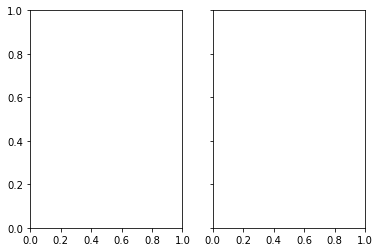

In [40]:
col_dict={0:"red",
          1:"green",
          2:"blue"}


labels = np.array(["Setosa","Versicolour","Virginica"])
len_lab = len(labels)

# We create a colormar from our list of colors
cm = ListedColormap([col_dict[x] for x in col_dict.keys()])


norm_bins = np.sort([*col_dict.keys()]) + 0.5
norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)

## Make normalizer and formatter
norm = mpl.colors.BoundaryNorm(norm_bins, len_lab, clip=True)
fmt = mpl.ticker.FuncFormatter(lambda x, pos: labels[norm(x)])

fig = plt.figure()    
fig, axes = plt.subplots(nrows = 1, ncols = 2, sharex=True, sharey = True)
axes = Axes3D(fig, elev=-150, azim=110, auto_add_to_figure=False)


#norm=plt.Normalize(-22,22)
sc = axes[0][0].scatter(PCAs[:, 0],
          PCAs[:, 1],
          PCAs[:, 2],
          c=y,
          cmap=cm,
          norm = norm,
          edgecolor="k",
          s =100,
          alpha = 0.5)
axes[0][0].set_xlabel('Crosses', labelpad = 5)

axes[0][1].scatter(PCAs_builtin[:, 0],
          PCAs_builtin[:, 1],
          PCAs_builtin[:, 2],
          c=y,
          cmap=cm,
          norm = norm,
          edgecolor="k",
          s =100,
          alpha = 0.5)
axes[0][1].set_xlabel('Circles', labelpad = 5)